# Titanic Competition

##### Importing Libraries

In [32]:
import pandas as pd
import numpy as np

#### Importing Training Data Set

In [33]:
df = pd.read_csv('/Users/francobenko/Documents/DataSets/titanic/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [34]:
df.shape

(891, 12)

 - Checking for N/A or null values in the data

In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 - Understanding the features

**PassengerId**

In [36]:
len(df['PassengerId'].unique())

891

In the PassengrerId feature there isn't any repeat values. 

In [37]:
print('The minumun PassengerId is: {}'.format(df['PassengerId'].min()))
print('The maximun PassengerId is: {}'.format(df['PassengerId'].max()))

The minumun PassengerId is: 1
The maximun PassengerId is: 891


In [228]:
df['PassengerId'].describe().to_frame()

PassengerId
count   891.000000
mean    446.000000
std     257.353842
min       1.000000
25%     223.500000
50%     446.000000
75%     668.500000
max     891.000000

- This is a categorical feature.

**Pclass**

In [38]:
print('The amount of unique values in the column is: {}'.format(len(df['Pclass'].unique())))
print('And the values are: {}, {}, {}'.format(df['Pclass'].unique()[0],df['Pclass'].unique()[1],df['Pclass'].unique()[2]))

The amount of unique values in the column is: 3
And the values are: 3, 1, 2


In [39]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
df['Pclass'].unique()[0]

3

In [229]:
df['Pclass'].describe().to_frame()

Pclass
count  891.000000
mean     2.308642
std      0.836071
min      1.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      3.000000

- This is a categorical feature.

**Sex**

In [41]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- One hot Encodign 

In [42]:
gender = ['female','male']
Sex_onehot = df['Sex'].map(lambda x: gender.index(x))

In [43]:
df['Sex']=Sex_onehot
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

- This is a categorical feature.

**Age**

- Observing the NaN values

In [44]:
df[df['Age'].isnull()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

     Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      1  NaN      0      0      330877   8.4583   NaN        Q  
17     1  NaN      0      0      244373  13.0000   NaN        S  
19     0  NaN      0      0        2649   7.2250   NaN        C  
26     1  NaN      0      0        2631   7.2250   NaN        C  
28     0  NaN      0      0      330959   7.8792   NaN        Q  
..   ...  ...    ...    ...         ...      ...   ...      ...  
859    1  NaN      0      0        2629   7.2292   NaN        C  
863    0  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    1  NaN      0      0      345777   9.5000   NaN        S  
878    1  NaN      0      0      349217   7.8958   NaN        S  
888    0  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

In [230]:
df['Age'].describe().to_frame()

Age
count  714.000000
mean    29.699118
std     14.526497
min      0.420000
25%     20.125000
50%     28.000000
75%     38.000000
max     80.000000

There is not any relationship or pattern at the missing values (first view)

We will try some imputs methods to view their effect in the final model.

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy='mean')
age_meanimp = imputer.fit_transform(df[['Age']])
#age_meanimp = pd.DataFrame(age_meanimp, columns=['Age_meanimp'])
age_meanimp = pd.Series(age_meanimp[:,0], name='Age_meanimp')
df['Age_meanimp'] = age_meanimp

In [60]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer (strategy='median')
age_medianimp = imputer2.fit_transform(df[['Age']])
#age_meanimp = pd.DataFrame(age_meanimp, columns=['Age_meanimp'])
age_medianimp = pd.Series(age_medianimp[:,0], name='Age_meanimp')
df['Age_medianimp'] = age_medianimp

- This is a numerical feature.

**SibSp**

In [47]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- This is a categorical feature.

**Parch**

In [48]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- This is a categorical feature.

**Ticket**

In [49]:
df['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
CA 2144               6
                     ..
111426                1
367232                1
A/5 21174             1
244278                1
SOTON/O.Q. 3101305    1
Name: Ticket, Length: 681, dtype: int64

In [50]:
pd.Series(df['Ticket'].unique(), name='Ticket')


0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
676     SOTON/OQ 392076
677              211536
678              112053
679              111369
680              370376
Name: Ticket, Length: 681, dtype: object

Applying Label Encoding 

In [51]:
ticket = list(df['Ticket'].unique())
ticket_labelenco = df['Ticket'].map(lambda x: ticket.index(x))
df['Ticket'] = ticket_labelenco
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

   Ticket     Fare Cabin Embarked  
0       0   7.2500   NaN        S  
1       1  71.2833   C85        C  
2       2   7.9250   NaN        S  
3       3  53.1000  C123        S  
4       4   8.0500   NaN        S

- This is a categorical feature.

**Fare**

In [52]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [231]:
df['Fare'].describe().to_frame()

Fare
count  891.000000
mean    32.204208
std     49.693429
min      0.000000
25%      7.910400
50%     14.454200
75%     31.000000
max    512.329200

- This is a numerical feature.

**Embarked**

In [53]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Applying Label Encoding 

In [54]:
embarked = list(df['Embarked'].unique())
embarked_labelenco = df['Embarked'].map(lambda x: embarked.index(x))
df['Embarked'] = embarked_labelenco
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

   Ticket     Fare Cabin  Embarked  
0       0   7.2500   NaN         0  
1       1  71.2833   C85         1  
2       2   7.9250   NaN         0  
3       3  53.1000  C123         0  
4       4   8.0500   NaN         0

- This is a categorical feature.

#### Getting the null accuracy

In [55]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Plotting some graphs

Appling some filtering to get some insights form the data

In [70]:
df_alive = df[df['Survived']==1]
df_dead = df[df['Survived']==0]
df_alive.head()

PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name  Sex   Age  SibSp  Parch  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.0      0      2   
9                Nasser, Mrs. Nicholas (Adele Achem)    0  14.0      1      0   

   Ticket     Fare Cabin  Embarked  Age_meanimp  Age_medianimp  
1       1  71.2833   C85         1         38.0           38.0  
2       2   7.9250   NaN         0         26.0           26.0  
3       3  53.1000  C123         0         35.0           35.0  
8       8  11.1333   NaN         0         27.0           27.0  
9       9  30.0708   NaN         1         14.0           14.0

Number of passenger alive:

In [64]:
df_alive.shape[0]

342

In [ ]:
pip install plotly

In [117]:
import plotly.graph_objects as go

x0=df_alive['Age_meanimp']
x1=df_dead['Age_meanimp']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
                           xbins=dict(
                               start=0,
                               end=85,
                               size=10),
                           name='Survived'))
fig.add_trace(go.Histogram(x=x1,
                           xbins=dict(
                               start=0,
                               end=85,
                               size=10),
                           name='Not Survived'))

# Overlay both histograms
fig.update_layout(title_text='Histogram of Age by Survived Situation', 
                  xaxis_title_text='Age', # xaxis label
                  yaxis_title_text='Count', # yaxis label
                  barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.55)
fig.show()

**Insight1 :**  The Age distribution in both survived situations seems to be normal.

In [118]:
# Data

y0=df_alive['Pclass'].value_counts()
x0=df_alive['Pclass'].unique()

y1=df_dead['Pclass'].value_counts()
x1=df_dead['Pclass'].unique()

# Plot

fig = go.Figure()
fig.add_trace(go.Bar(
    y=y0,
    x=x0,
    name='Survived',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=y1,
    x=x1,
    name='Not Survived',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))
# Overlay both histograms
fig.update_layout(title_text='Count of Survived Situation by Passenger Class', 
                  xaxis_title_text='Pclass', # xaxis label
                  yaxis_title_text='Count', # yaxis label
                  barmode='group')
fig.show()



**Insight2 :**  The Passenger Class 3 seems to be more likely to not survive.

In [119]:
# Data
y0=df_alive['SibSp'].value_counts()
x0=df_alive['SibSp'].unique()

y1=df_dead['SibSp'].value_counts()
x1=df_dead['SibSp'].unique()

# Plot

fig = go.Figure()
fig.add_trace(go.Bar(
    y=y0,
    x=x0,
    name='Survived',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=y1,
    x=x1,
    name='Not Survived',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))
# Overlay both histograms
fig.update_layout(title_text='Count of Survived Situation by Family Relationship', 
                  xaxis_title_text='SibSp', # xaxis label
                  yaxis_title_text='Count', # yaxis label
                  barmode='group')
fig.show()



In [122]:
#Data 
y0=df_alive['Parch'].value_counts()
x0=df_alive['Parch'].unique()

y1=df_dead['Parch'].value_counts()
x1=df_dead['Parch'].unique()

#plot

fig = go.Figure()
fig.add_trace(go.Bar(
    x=y0,
    y=x0,
    name='Survived',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    x=y1,
    y=x1,
    name='Not Survived',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))
# Overlay both histograms
fig.update_layout(title_text='Count of Survived Situation by Parch', 
                  xaxis_title_text='Count', # xaxis label
                  yaxis_title_text='Parch', # yaxis label
                  barmode='group')
fig.show()



**Insight3 :**  The Patch labeled as 2 seems to be more likely to survive.

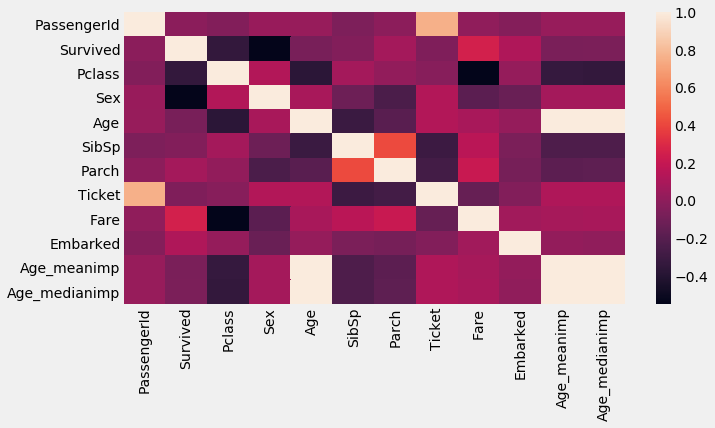

In [126]:
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
style.use('fivethirtyeight')
ax = sns.heatmap(df.corr())


In [127]:
df.corr()

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId       1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived         -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass           -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex               0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age               0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp            -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch            -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Ticket            0.760875 -0.047298 -0.017489  0.132709  0.133553 -0.303229   
Fare              0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Embarked         -0.029906  0.118026  0.028566 -0.128526  0.031556 -0.063794   
Age_meanimp       0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
Age_medianimp     0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   

                  Parch    Ticket      Fare  Embarked  Age_meanimp  \
PassengerId   -0.001652  0.760875  0.012658 -0.029906     0.033207   
Survived       0.081629 -0.047298  0.257307  0.118026    -0.069809   
Pclass         0.018443 -0.017489 -0.549500  0.028566    -0.331339   
Sex           -0.245489  0.132709 -0.182333 -0.128526     0.084153   
Age           -0.189119  0.133553  0.096067  0.031556     1.000000   
SibSp          0.414838 -0.303229  0.159651 -0.063794    -0.232625   
Parch          1.000000 -0.273002  0.216225 -0.082144    -0.179191   
Ticket        -0.273002  1.000000 -0.142578 -0.037227     0.120275   
Fare           0.216225 -0.142578  1.000000  0.071010     0.091566   
Embarked      -0.082144 -0.037227  0.071010  1.000000     0.023578   
Age_meanimp   -0.179191  0.120275  0.091566  0.023578     1.000000   
Age_medianimp -0.172482  0.119047  0.096688  0.007505     0.998642   

               Age_medianimp  
PassengerId         0.034212  
Survived           -0.064910  
Pclass             -0.339898  
Sex                 0.081163  
Age                 1.000000  
SibSp              -0.233296  
Parch              -0.172482  
Ticket              0.119047  
Fare                0.096688  
Embarked            0.007505  
Age_meanimp         0.998642  
Age_medianimp       1.000000

**Insight4 :**  The Features with more influence in the Survived are `Sex`, `Pclass` and `Fare`.

#### Applying machine learning in training environment

In [203]:
#Splitting the data set
X = df[['Pclass','Sex','Fare','Embarked']]
y = df['Survived'] 

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**K-NN Classifier**

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors':[3,4,5,6]}
knn = KNeighborsClassifier()
grid = GridSearchCV (knn, knn_params)
grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [141]:
print('The best accuracy accomplish is {} with {} neighbors'.format(grid.best_score_, grid.best_params_['n_neighbors']))

The best accuracy accomplish is 0.7755696440901387 with 3 neighbors


In [204]:
knn_ = KNeighborsClassifier(n_neighbors= 3)
knn_.fit(X,y)
knn_y_pred = knn_.predict(X)

knn_f1 = f1_score(y, knn_y_pred)
knn_acc = accuracy_score(y, knn_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(knn_f1))
print('The accuracy score for this model is: {}'.format(knn_acc))

The F1 Score for this model is: 0.8102409638554215
The accuracy score for this model is: 0.8585858585858586


**Logistic Regression**

In [205]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_params = {'C': [1e-2,5e-2,1e-1, 5e-1, 1e0], 'penalty' : ['l1','l2']}
grid = GridSearchCV(lr, lr_params,error_score=0.)
grid.fit(X,y)

/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/Users/francobenko/anaconda3/lib/python3

GridSearchCV(cv=None, error_score=0.0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [206]:
print('The best accuracy accomplish is {} with {}'.format(grid.best_score_, grid.best_params_))

The best accuracy accomplish is 0.7957629778419435 with {'C': 0.05, 'penalty': 'l2'}


In [207]:
lr_ = LogisticRegression(C= 0.05, penalty='l2')
lr_.fit(X,y)
lr_y_pred = lr_.predict(X)

lr_f1 = f1_score(y, lr_y_pred)
lr_acc = accuracy_score(y, lr_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(lr_f1))
print('The accuracy score for this model is: {}'.format(lr_acc))

The F1 Score for this model is: 0.7011686143572621
The accuracy score for this model is: 0.7991021324354658


**Decision Tree Classifier**

In [149]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
tree_params = {'max_depth':[None,1,3,5,7,9]}
grid = GridSearchCV(d_tree, tree_params,error_score=0.)
grid.fit(X,y)

GridSearchCV(cv=None, error_score=0.0,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [None, 1, 3, 5, 7, 9]},
             

In [150]:
print('The best accuracy accomplish is {} with {}'.format(grid.best_score_, grid.best_params_))

The best accuracy accomplish is 0.8137656142112861 with {'max_depth': None}


In [208]:
tree_ = DecisionTreeClassifier()
tree_.fit(X,y)
tree_y_pred = tree_.predict(X)

tree_f1 = f1_score(y, tree_y_pred)
tree_acc = accuracy_score(y, tree_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(tree_f1))
print('The accuracy score for this model is: {}'.format(tree_acc))

The F1 Score for this model is: 0.8736349453978159
The accuracy score for this model is: 0.9090909090909091


**Random Forest Classifier**

In [214]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest_params = {'n_estimators':[50,100, 250, 500], 'max_depth':[5 , 7, 9, 12]}
grid = GridSearchCV(forest, forest_params, error_score=0.)
grid.fit(X,y)

GridSearchCV(cv=None, error_score=0.0,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [215]:
print('The best accuracy accomplish is {} with {}'.format(grid.best_score_, grid.best_params_))

The best accuracy accomplish is 0.8125918021467579 with {'max_depth': 7, 'n_estimators': 500}


In [216]:
forest_ = RandomForestClassifier(max_depth=7, n_estimators=500)
forest_.fit(X,y)
forest_y_pred = forest_.predict(X)

forest_f1 = f1_score(y, forest_y_pred)
forest_acc = accuracy_score(y, forest_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(forest_f1))
print('The accuracy score for this model is: {}'.format(forest_acc))

The F1 Score for this model is: 0.8118811881188119
The accuracy score for this model is: 0.8720538720538721


**Naive Bayes Classifier**

In [217]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_params = {'var_smoothing':[1e-7,1e-9,1e-5,5e-4,1e-4]}
grid = GridSearchCV(nb, nb_params, error_score=0.)
grid.fit(X,y)

GridSearchCV(cv=None, error_score=0.0,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-07, 1e-09, 1e-05, 0.0005,
                                           0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [218]:
print('The best accuracy accomplish is {} with {}'.format(grid.best_score_, grid.best_params_))

The best accuracy accomplish is 0.7924110225346809 with {'var_smoothing': 1e-05}


In [220]:
nb_ = GaussianNB(var_smoothing = 1e-5)
nb_.fit(X,y)
nb_y_pred = nb_.predict(X)

nb_f1 = f1_score(y, nb_y_pred)
nb_acc = accuracy_score(y, nb_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(nb_f1))
print('The accuracy score for this model is: {}'.format(nb_acc))

The F1 Score for this model is: 0.7049180327868851
The accuracy score for this model is: 0.797979797979798


**Suppor Vector Classifier**

In [167]:
from sklearn.svm import SVC

svc= SVC()
svc_params = {'C':[-1,0,1,3,5], 'kernel':['poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(svc, svc_params, error_score=0.)
grid.fit(X,y)

/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: C <= 0


/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: C <= 0


/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: C <= 0


/Users/francobenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000.

GridSearchCV(cv=None, error_score=0.0,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [-1, 0, 1, 3, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [168]:
print('The best accuracy accomplish is {} with {}'.format(grid.best_score_, grid.best_params_))

The best accuracy accomplish is 0.6678865105768628 with {'C': 1, 'kernel': 'rbf'}


In [221]:
svc_ = SVC(C=1, kernel= 'rbf')
svc_.fit(X,y)
svc_y_pred = svc_.predict(X)

svc_f1 = f1_score(y, svc_y_pred)
svc_acc = accuracy_score(y, svc_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(svc_f1))
print('The accuracy score for this model is: {}'.format(svc_acc))

The F1 Score for this model is: 0.3881856540084388
The accuracy score for this model is: 0.6745230078563412


**Stochastic Gradient Descent**

In [192]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc_params = {'loss':['modified_huber', 'squared_hinge', 'perceptron'], 'alpha':[1e-7,1e-6,1e-5,5e-5,3e-5,1e-5,1e-3,1e0,1e2]}
grid = GridSearchCV(sgdc, sgdc_params, error_score=0.)
grid.fit(X,y)

GridSearchCV(cv=None, error_score=0.0,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 5e-05, 3e-05, 1e-05,
                                   0.001, 1.0, 100.0],
                         'loss': ['modified_huber', 'squared_hinge',
     

In [193]:
print('The best accuracy accomplish is {} with {}'.format(grid.best_score_, grid.best_params_))

The best accuracy accomplish is 0.7351453141673467 with {'alpha': 3e-05, 'loss': 'modified_huber'}


In [224]:
sgdc_ = SGDClassifier(loss='modified_huber', alpha=3e-5)
sgdc_.fit(X,y)
sgdc_y_pred = sgdc_.predict(X)

sgdc_f1 = f1_score(y, sgdc_y_pred)
sgdc_acc = accuracy_score(y, sgdc_y_pred) #In binary and multiclass classification, this function is equal to the jaccard_score function.
print('The F1 Score for this model is: {}'.format(sgdc_f1))
print('The accuracy score for this model is: {}'.format(sgdc_acc))

The F1 Score for this model is: 0.6954314720812184
The accuracy score for this model is: 0.7306397306397306


#### Model Comparison in Trainning Environment

In [225]:
pd.DataFrame({'Models':['K-NN Classifier', 
                        'Logistic Regression', 
                        'Decision Tree Classifier', 
                        'Random Forest Classifier', 
                        'Naive Bayes Classifier', 
                        'SVM Classifier',
                        'Stochastic Gradient Decent'],
             'Accuracy Score': [knn_acc, 
                               lr_acc, 
                               tree_acc, 
                               forest_acc, 
                               nb_acc, 
                               svc_acc,
                               sgdc_acc], 
             'F1 Score':[knn_f1, 
                        lr_f1, 
                        tree_f1, 
                        forest_f1, 
                        nb_f1, 
                        svc_f1, 
                        sgdc_f1]})

Models  Accuracy Score  F1 Score
0             K-NN Classifier        0.858586  0.810241
1         Logistic Regression        0.799102  0.701169
2    Decision Tree Classifier        0.909091  0.873635
3    Random Forest Classifier        0.872054  0.811881
4      Naive Bayes Classifier        0.797980  0.704918
5              SVM Classifier        0.674523  0.388186
6  Stochastic Gradient Decent        0.730640  0.695431

#### Applying each model to the testing data

Importing the test data

In [232]:
df_test = pd.read_csv('/Users/francobenko/Documents/DataSets/titanic/test.csv')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Applying the encoding to the features.

In [233]:
df_test['Sex'] = df_test['Sex'].map(lambda x: gender.index(x))
df_test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [254]:
df_test['Embarked'] = df_test['Embarked'].map(lambda x: embarked.index(x))
df_test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         2  
1  47.0      1      0   363272   7.0000   NaN         0  
2  62.0      0      0   240276   9.6875   NaN         2  
3  27.0      0      0   315154   8.6625   NaN         0  
4  22.0      1      1  3101298  12.2875   NaN         0

#### Applying machine learning in testing environment

In [241]:
#Splitting the data set
X_t = df_test[['Pclass','Sex','Fare','Embarked']]
X_t.isnull().sum()

Pclass      0
Sex         0
Fare        1
Embarked    0
dtype: int64

In [242]:
X_t.describe()

Pclass         Sex        Fare    Embarked
count  418.000000  418.000000  417.000000  418.000000
mean     2.265550    0.636364   35.627188    0.464115
std      0.841838    0.481622   55.907576    0.685516
min      1.000000    0.000000    0.000000    0.000000
25%      1.000000    0.000000    7.895800    0.000000
50%      3.000000    1.000000   14.454200    0.000000
75%      3.000000    1.000000   31.500000    1.000000
max      3.000000    1.000000  512.329200    2.000000

In [243]:
X_t['Fare'].fillna(np.mean(X_t['Fare']), inplace = True)
X_t['Fare'].isnull().sum()

/Users/francobenko/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [249]:
#Predicting with the best model from the test environment
y_test = tree_.predict(X_t)
y_test = pd.Series(y_test, name='Survived')
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [252]:
df_pred = pd.DataFrame([df_test['PassengerId'],y_test]).T

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [256]:
df_pred.to_csv(r'/Users/francobenko/Documents/DataSets/titanic/titanic_predictions.csv',index = False)